# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Annisa Mufidatun Sholihah
- **Email:** annisamufidatun@gmail.com
- **ID Dicoding:** annisams11

## Menentukan Pertanyaan Bisnis

- Berapa jumlah revenue tiap bulan dari E-Commerce?
- Apa saja 5 produk yang paling banyak dijual dan paling kurang diminati?
- Daerah mana dengan pembeli paling banyak berdasarkan kota dan state?
- Daerah mana dengan penjual paling banyak berdasarkan kota dan state?
- RFM Analysis

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

## Data Wrangling

### Gathering Data

In [2]:
dir = 'D:/tugas/dashboard_dicoding/data/'
#import data produk
produk = pd.read_csv( dir + 'products_dataset.csv')

#import data penjualan
orders= pd.read_csv(dir + 'orders_dataset.csv')

#import data pelanggan
cust = pd.read_csv(dir + 'customers_dataset.csv')

#import data penjual
sellers = pd.read_csv(dir + 'sellers_dataset.csv')

#import data pembayaran
payment = pd.read_csv(dir + 'order_payments_dataset.csv')

#import data item jual
jual = pd.read_csv(dir + 'order_items_dataset.csv')

#import data kategori
category = pd.read_csv(dir + 'product_category_name_translation.csv')

#import data geografi
geografi = pd.read_csv(dir + 'geolocation_dataset.csv')


#### cek isi tiap data

In [3]:
produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
jual.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
geografi.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

#### cek informasi tiap data

In [11]:
produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [15]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
jual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [18]:
geografi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### cek null value tiap data

In [19]:
produk.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [21]:
cust.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [23]:
payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
jual.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [25]:
category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [26]:
geografi.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### cek data duplikat tiap data

In [27]:
produk.duplicated().sum()

0

In [28]:
orders.duplicated().sum()

0

In [29]:
cust.duplicated().sum()

0

In [30]:
sellers.duplicated().sum()

0

In [31]:
payment.duplicated().sum()

0

In [32]:
jual.duplicated().sum()

0

In [33]:
category.duplicated().sum()

0

In [34]:
geografi.duplicated().sum()

261831

### Cleaning Data

**Cleaning 1**

Untuk cleaning data yang pertama adalah data geografi karena dataset geografi memiliki data duplikat sebanyak 261.831 data. Pertama kita menghapus data duplikat yang ada di dataset geografi kemudian kita cek lagi data yang ada di dataset geografi

In [35]:
geografi.drop_duplicates(inplace=True)
print("total duplikasi:", geografi.duplicated().sum())
geografi.head()

total duplikasi: 0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Cleaning 2**
Kemudian kita akan meninjau missing value yang ada di dataset produk

In [36]:
produk[produk.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [37]:
#cek apakah nilai product id unik (atau tidak ada yang sama)
number_unique_products = produk['product_id'].nunique()
print(number_unique_products)

32951


In [38]:
produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dari dataset di atas dapat dilihat bahwa atribut yang nilainya hilang adalah atribut product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty. Dengan melihat value dari atribut tersebut saya tidak mengisi atau menghapus baris data yang memiliki nilai null karena setiap baris menggambarkan satu produk yang berbeda dilihat dari value product_id semuanya unik sehingga jika drop baris akan menghilangkan produk dan atribut yang memiliki nilai null sulit untuk diisi dengan nilai modus atau mean dari data.

**Cleaning 3**
Kemudian kita cek dataset orders yang bernilai null

In [39]:
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [40]:
#cek apakah nilai product id unik (atau tidak ada yang sama)
number_unique_products2 = orders['order_id'].nunique()
print(number_unique_products2)

99441


In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Dari dataset di atas dapat dilihat bahwa atribut yang nilainya hilang adalah atribut order_approved_at, order_delivered_carrier_date, dan	order_delivered_customer_date. Dengan melihat value dari atribut tersebut saya tidak mengisi atau menghapus baris data yang memiliki nilai null karena setiap baris menggambarkan satu riwayat pencatatan order atau pesanan yang berbeda dilihat dari value order_id semuanya unik sehingga jika drop baris akan menghilangkan record dan atribut yang memiliki nilai null sulit untuk diisi dengan nilai modus atau mean dari data karena tipe data berupa datetime dan timestamp.

## Exploratory Data Analysis (EDA)

### Explore data produk


In [42]:
#Melihat data produk secara acak
produk.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11242,170e27ee183ac140aa68a86bacd2a6dc,relogios_presentes,54.0,483.0,2.0,1100.0,30.0,10.0,25.0
7689,6b5170a2d3ae93a38e63f17b356da239,utilidades_domesticas,40.0,464.0,1.0,1200.0,28.0,8.0,13.0
4257,7d634a0a3016f753b828575a458269b5,informatica_acessorios,42.0,250.0,2.0,200.0,23.0,6.0,15.0
3921,400a9b04cf215f1074b01b1d6c6104a4,beleza_saude,49.0,3901.0,8.0,2250.0,35.0,8.0,35.0
5201,681d59c14b2515dcc09149055ba5b0c8,cama_mesa_banho,35.0,104.0,1.0,500.0,25.0,37.0,36.0


In [43]:
# cek data tiap atribut dalam dataset produk
produk.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [44]:
# cek value duplikat di id produk
print(produk.product_id.is_unique)

#Value true artinya setiap baris data bernilai unik.

True


In [45]:
#melihat produk dari kategori
produk.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Explore data orders

In [46]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
25518,0459f8e390241a0cad720e0fce4e66a7,4a66e81f5facbb22056e99f332d918b9,delivered,2017-09-22 19:32:03,2017-09-26 03:28:20,2017-09-26 18:54:51,2017-09-30 13:34:08,2017-10-16 00:00:00
3695,cf3a9fb2f3b7b0d71c3a8e59c01ad281,f1cc6f2b2d1fe79fc891d57a5b05e44a,delivered,2017-11-08 16:46:11,2017-11-08 17:30:49,2017-11-09 15:41:13,2017-11-23 20:11:34,2017-12-01 00:00:00
84410,ae7b08afee9ee717c25cbd511dc5f548,4040c1376c85d2a36fff4f3b8a24ad29,delivered,2017-10-15 22:15:30,2017-10-15 22:28:27,2017-10-17 13:48:08,2017-10-23 18:18:46,2017-11-10 00:00:00
12895,39444c4357a54def3a087956dbb17e62,8c1c6531da36aa724b50271c55a29ecf,delivered,2017-08-17 20:09:29,2017-08-19 02:30:17,2017-08-22 18:27:57,2017-09-15 16:24:43,2017-09-13 00:00:00
93795,a8c12ad0f19ddd006359fef29b1eafc0,0ed69dedf24f7a41d9a121f868ca58a7,delivered,2018-01-31 11:51:37,2018-01-31 14:21:24,2018-02-01 16:33:59,2018-02-05 17:54:34,2018-02-16 00:00:00


In [47]:
# cek data tiap atribut dalam dataset orders
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [48]:
# cek value duplikat di id orders
print(orders.order_id.is_unique)

#Value true artinya setiap baris data bernilai unik.

True


In [49]:
#melihat produk dari kategori
orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore data customer

In [50]:
cust.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
97793,ffb4dbe856e39f4c88fd2abdd505436a,34f8bf4ecb58cb0cd5652c24a8c55ba3,33980,taquaracu de minas,MG
91127,0d8c2b410b5954297eb4323ad13db551,e5441766ddb620292c1f6c3953ee3645,67133,ananindeua,PA
41307,29dcc155cda9479696b8bf386aca3e1a,15db2039c3a64d0b3e6a6dda4f4d0381,5448,sao paulo,SP
94030,984cf72312d65695c494a2d60d43857e,467dbf2b36b570c4fabc2c2e463068fe,22640,rio de janeiro,RJ
9056,f0f80b29ec7bddd2eabfd008e1596571,7107bcac3f45a886c9f726ffe6120886,13570,sao carlos,SP


In [51]:
# cek data tiap atribut dalam dataset customer
cust.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [52]:
# cek value duplikat di id pelanggan
print(cust.customer_id.is_unique)

#Value true artinya setiap baris data bernilai unik.

True


Mencari persebaran pelanggan berdasarkan kota dan state (provinsi)

In [53]:
cust.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [54]:
cust.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore data sellers

In [55]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1181,9c068d10aca38e85c50202e17b4a7e88,79400,coxim,MS
2603,ad8ada0ffa993cb1197d102d9ab21a3e,38445,araguari,MG
1993,d32e3909cfb714fb2a6cb092c85b9c5f,13215,jundiai,SP
1335,c113b8df1fc375bc3d73d29c1b1144d1,8021,sao paulo,SP
1554,edf96ef93ed595084bbcbd9224bd2894,1545,sao paulo,SP


In [56]:
# cek data tiap atribut dalam dataset customer
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [57]:
# cek value duplikat di id penjual
print(sellers.seller_id.is_unique)

#Value true artinya setiap baris data bernilai unik.

True


Mencari persebaran seller atau penjual berdasarkan kota dan state (provinsi)

In [58]:
sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [59]:
sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore data payment

In [60]:
payment.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
44639,60497e7e5e68a6c28a15eaafea0f1e94,1,credit_card,1,54.00
70315,3955a17bc8a7cef95b535fb96e2abac0,1,credit_card,1,30.28
64862,8ef12780aa1f3903b1d9ab621f69abfb,1,credit_card,2,429.52
32918,e4a4be9057b0723c5014f56c6d4ba6ca,1,credit_card,4,44.71
34678,e5dad7f6c0e2ddd8daee42d61d7063fb,1,credit_card,2,156.37


In [61]:
payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [62]:
# cek value duplikat di id pesanan
print(payment.order_id.is_unique)

#Value true artinya setiap baris data bernilai unik.

False


In [63]:
payment.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore data penjualan

In [64]:
jual.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21264,30ab609acdb1c2d3756dc46d1e7d93f9,2,564b94c475df8a4e5b258cf3f3e410d6,6d66611d7c44cc30ce351abc49a68421,2017-09-08 17:25:16,79.90,16.32
1324,031530e9ab00574597b21443baa61f08,1,db6677c6f890ba1730c0b75bd8132579,cc419e0650a3c5ba77189a1882b7556a,2018-03-09 10:35:45,59.99,16.67
42248,60403cf93cb435af3ff040a1b5e65b3c,1,5d5288d3096b9becaa3566f64fe88110,c3cfdc648177fdbbbb35635a37472c53,2018-01-24 14:51:54,46.90,14.10
38047,565073e67c654be3a7e7fe0e10e36629,1,46ded74d8d8e187dabe94a64dd15a7cd,fc906263ca5083d09dce42fe02247800,2017-05-29 23:10:13,39.90,14.10
61577,8c729ac31acf9a7169cfd3fd01e714cc,1,79e42c4fa2bde6e0c828d23c4fb7df35,6d66611d7c44cc30ce351abc49a68421,2018-02-01 03:18:31,77.90,11.75


In [65]:
jual.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [66]:
# cek value duplikat di id pesanan
print(jual.order_id.is_unique)


False


Value false artinya setiap baris data tidak bernilai unik. Hal ini karena dalam satu pesanan bisa terdapat lebih dari satu barang yang mana artinya record untuk order_id tersebut bisa ada lebih dari satu

In [67]:
jual.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
ceb7b4fb9401cd378de7886317ad1b47       1
cecd97bc34ed8330bd4cd15713eda670       1
5b92bfa4120daa27c574daa2e386c693       1
5aaa890629f83706d8d9bfecd8377c1c       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

### Explore data category

In [68]:
category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [69]:
# cek value duplikat di data
print(category.product_category_name.is_unique)
print(category.product_category_name_english.is_unique)

True
True


Nilai true artinya setiap baris data merupakan data yang unik.

### Menggabungkan data

#### menggabungkan data orders dan cust

In [70]:
order_cust_df = pd.merge(
    left= orders,
    right= cust,
    how= "left",
    left_on= "customer_id",
    right_on= "customer_id"
)

order_cust_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1368,ed1407b1e486fadba3e6cd4460dccd56,d83913dc23a7f3c90ff7a10d1b4bd4c6,shipped,2017-10-22 12:55:42,2017-10-22 13:14:28,2017-10-24 11:46:06,NaN,2017-11-14 00:00:00,583fb3ee33cf172db8eedc575ad88d0a,23050,rio de janeiro,RJ
51313,f99260ff704e2093540102a797c0a7cb,1c902b37a0bca21307de0544a1293a97,delivered,2018-01-26 00:07:55,2018-01-27 11:57:23,2018-01-29 19:33:54,2018-02-06 20:19:10,2018-02-26 00:00:00,5ac4bf5c7946aaa4c37893300a46e9e6,29062,vitoria,ES
21872,682332c2474e425ea23c40848faa25e2,e0d50842eb1d45e542c592466bcc06b5,delivered,2017-11-02 15:43:52,2017-11-02 15:55:31,2017-11-03 20:39:38,2017-11-09 15:42:03,2017-11-30 00:00:00,f2b309d635229f7ff00c0ec3ca616d92,6472,barueri,SP
1806,5394217c78ea24ee2b377c043b6bd7d9,74bfc507b3ac32b750e60fffd04a02cc,delivered,2017-07-04 10:24:45,2017-07-04 10:35:09,2017-07-05 13:35:37,2017-07-06 15:43:30,2017-07-17 00:00:00,a5383a6d51465659e9153a2a6045e3b1,8773,mogi das cruzes,SP
18703,0d266849a05d14eb00b7c5db250a2943,1155c9657f8dd0bef9cd816ec66452a1,delivered,2017-07-14 09:26:37,2017-07-14 09:43:50,2017-07-14 18:21:29,2017-07-25 18:27:53,2017-08-07 00:00:00,0e8750e4ffa3dc86470cdfa30237f867,35931,joao monlevade,MG
99230,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23 00:00:00,a2fb4a981e80db81e95c63cb85d3473b,17501,marilia,SP
82023,15c820a6083da915f1212f0945b3d90b,93f3f392caa4b8909f602c29b76b76e7,delivered,2017-11-05 17:27:31,2017-11-05 17:35:34,2017-11-07 15:55:03,2017-11-14 17:38:00,2017-11-28 00:00:00,ad2ba9ffc25294bd578b5662b79adc2a,24355,niteroi,RJ
98138,cb110387675cb9e3354ff5fc1b25346f,ce1fc521645083f008569f9ab85325cf,delivered,2018-04-04 09:32:27,2018-04-04 11:09:55,2018-04-04 21:36:40,2018-04-12 22:56:29,2018-04-27 00:00:00,87d2cb1d11a2494ee3b37e2816ad442a,73813,formosa,GO
95363,b100288d2ef3b6e474121c21d2af0678,19220a635821c641df0bd2fb1e4ece5c,delivered,2018-01-07 14:46:43,2018-01-07 14:57:15,2018-01-09 18:07:43,2018-01-23 15:07:41,2018-02-02 00:00:00,839cf99e32e20edf5e5c847431b32778,4138,sao paulo,SP
16916,d5b1124327e83f25ce12d9c48c9ecfe3,c44dee37ceb2eba1a4c21adb28eec6a8,delivered,2017-07-08 09:26:51,2017-07-08 09:43:27,2017-07-13 20:23:52,2017-07-21 17:52:15,2017-08-01 00:00:00,20d8ee7a865ead2c077ed57efba41c06,35740,esmeraldas,MG


#### menggabungkan data produk dan jual

In [71]:
prod_ord_df = pd.merge(
    left= jual,
    right= produk,
    how= "left",
    left_on= "product_id",
    right_on= "product_id"
)

prod_ord_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
74095,a8e0edb5ff1461490db1feb08678bbb7,1,9aa9caee155847cddb376a05b9a39791,ea8482cd71df3c1969d7b9473ff13abc,2017-12-22 14:11:30,29.99,7.78,telefonia,60.0,777.0,6.0,300.0,17.0,4.0,12.0
35181,4faf80dc9fb66032ad2dfb5a78c2c56b,1,01cf56cd6138b926a4802d16fc304149,06e5eefc71ec47ae763c5c6f8db7064f,2018-04-06 19:08:01,179.93,23.76,eletronicos,43.0,3023.0,6.0,100.0,16.0,16.0,16.0
46286,692bd5c2be36c7274148d55f3ab22edc,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-12-01 11:30:47,45.90,17.92,moveis_decoracao,59.0,473.0,1.0,600.0,30.0,3.0,20.0
47392,6bbd90ca863235a9127bcc432f30af08,1,1ac94144a305b4bc370804ca0d290490,138dbe45fc62f1e244378131a6801526,2018-05-28 13:55:34,5.90,7.39,beleza_saude,53.0,389.0,3.0,100.0,16.0,3.0,12.0
87574,c6d5501e88e1bdffbc13792a7f4dadda,2,2b2428ab65b564c08fd9b40e187df246,d8cf3b6a2151949f930d0252b180ec42,2018-05-16 16:20:36,59.90,18.25,bebidas,44.0,304.0,1.0,1700.0,33.0,33.0,15.0
23411,35608f7cae2658ba060f4fec29ee1f81,3,e3ffa5b25f4a372e7ccf597b6ceb6c90,5a8e7d5003a1f221f9e1d6e411de7c23,2017-02-24 07:54:16,59.90,11.79,bebes,57.0,2049.0,2.0,600.0,65.0,11.0,11.0
81692,b9aa04fee730826d066fd6b7f63def15,1,cd0efbe03468ba1f0f33c664b53747a9,a17f621c590ea0fab3d5d883e1630ec6,2017-07-20 17:43:45,17.33,8.27,esporte_lazer,48.0,1148.0,1.0,250.0,16.0,8.0,12.0
111173,fc956251c8eb3a139e862178fe18b68d,1,308a7360ee2e0ecfb6aa7708428692af,128639473a139ac0f3e5f5ade55873a5,2017-09-11 21:24:07,25.90,15.10,eletronicos,56.0,568.0,1.0,150.0,16.0,7.0,11.0
69173,9df975b38ffcb2931968b4949c8b29a2,1,1c5bd6a742367ec4d654a0859523e880,1f9ab4708f3056ede07124aad39a2554,2017-07-20 11:25:15,119.90,18.73,bebes,45.0,821.0,4.0,4550.0,40.0,10.0,40.0
90896,ce771c5895b52f1d306746c60afba9b0,1,505005df95180728667b709c27783732,17a053fcb14bd219540cbde0df490be0,2017-07-27 15:44:03,179.98,45.73,moveis_escritorio,38.0,2264.0,1.0,11400.0,58.0,35.0,58.0


#### menggabungkan data order_cust_df dan prod_ord_df


In [72]:
order1_df = pd.merge(
    left= order_cust_df ,
    right= prod_ord_df,
    how= "left",
    left_on= "order_id",
    right_on= "order_id"
)

order1_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
38404,2cc44017e7eba3d4a59e029af9df7e31,a002b6265756c2bf5ba1f596ac8847b2,delivered,2018-08-07 12:21:32,2018-08-07 12:35:16,2018-08-09 14:28:00,2018-08-14 16:55:31,2018-08-31 00:00:00,8da8e5f4165a7d5e1d0fb2b6061c415f,20720,...,110.00,15.87,perfumaria,41.0,629.0,1.0,318.0,27.0,27.0,26.0
89973,5ce0709158a972bda105a5c17a5094ed,42f5a4ada1492abc600687788ab83290,delivered,2017-12-02 21:08:30,2017-12-02 21:40:40,2017-12-06 00:34:47,2017-12-07 14:03:29,2017-12-27 00:00:00,26874c233e3f7b363d33153b29e0c133,9910,...,134.90,13.96,cama_mesa_banho,55.0,246.0,1.0,1800.0,38.0,10.0,38.0
1670,b3b9c134c866906502560d298369a253,b55d0d8610fbb4935574a98c33c6a60f,delivered,2017-08-15 22:45:17,2017-08-16 01:05:41,2017-08-17 17:59:03,2017-08-25 20:17:32,2017-09-11 00:00:00,8cad83eb2c96c92f1c57c2a250d99855,21061,...,48.00,16.11,informatica_acessorios,60.0,392.0,2.0,540.0,17.0,10.0,14.0
45309,7d2d231c0b3abb985ed020ffa3acf300,ef239d35ce43ebac174ad5c581b03ae4,delivered,2018-03-02 21:40:30,2018-03-02 22:55:34,2018-03-05 20:52:00,2018-04-07 00:13:31,2018-03-23 00:00:00,90f6eb2f741df0db68e7fa1113baae85,25974,...,60.00,16.18,alimentos_bebidas,59.0,3762.0,1.0,875.0,23.0,17.0,17.0
46348,d68cb705b9d644fcf651e59d9c01ba24,0335d2d38f73c105f274b4cf306c2a32,delivered,2018-05-08 13:49:19,2018-05-08 14:15:34,2018-05-09 11:54:00,2018-05-19 00:34:57,2018-06-18 00:00:00,5697e2a4b157e2c895ae2bd9f0aa406a,20270,...,44.24,35.48,pet_shop,59.0,265.0,1.0,7300.0,20.0,40.0,60.0
23991,3bd9055cde8c3ff6e14396459c776cbf,cd8b1e5a7b8c53ab97a47bdb544e930c,delivered,2018-08-12 00:26:37,2018-08-12 00:35:14,2018-08-14 13:16:00,2018-08-18 19:31:29,2018-08-22 00:00:00,85d6439a40fc12f6805c04147e9c3743,22470,...,111.27,15.88,beleza_saude,56.0,73.0,1.0,413.0,18.0,11.0,13.0
14200,a523c396a29386423aa594fe448ca713,e2431d4ec21d4a66b411af4e65c4cb1b,delivered,2017-11-29 15:49:41,2017-11-29 17:30:55,2017-12-04 20:39:11,2018-01-04 23:48:54,2017-12-28 00:00:00,7a2cb8d19676becd361d051a9684d084,77470,...,28.99,25.63,telefonia,48.0,461.0,5.0,150.0,19.0,4.0,11.0
58770,3adc794e637a2ef67f006b35b36904a4,f958257e75b1b3b9a4bff40960c980e6,delivered,2018-02-08 23:51:51,2018-02-09 00:07:49,2018-02-14 20:15:47,2018-02-27 13:26:28,2018-03-06 00:00:00,c303b63cb83680355d0c6277ab63933a,65015,...,24.99,21.15,telefonia,59.0,734.0,4.0,300.0,17.0,4.0,12.0
55115,1212c7b1c4195950e99e75fa6ec2a309,dbf31702420415660be9a8a9f33f3c3a,delivered,2018-01-22 23:51:49,2018-01-23 00:15:11,2018-01-23 23:29:04,2018-02-02 14:55:06,2018-02-26 00:00:00,351a0e8f58d932eac460f4b7a8321d64,54310,...,12.89,25.63,pet_shop,53.0,468.0,1.0,200.0,16.0,8.0,15.0
94528,69600803432bcfbc3764354576c52306,3aae68d7af683af2f74cef9591ca310d,delivered,2017-05-17 22:01:53,2017-05-19 11:23:01,2017-05-19 12:52:23,2017-06-02 08:05:56,2017-06-06 00:00:00,325531ceaefe16b9a42f032c311f4e3a,3908,...,19.90,11.85,cama_mesa_banho,52.0,506.0,3.0,3225.0,60.0,13.0,30.0


#### Menggabungkan data order dengan penjual

In [73]:
order2_df = pd.merge(
    left= order1_df,
    right= sellers,
    how= "left",
    left_on= "seller_id",
    right_on= "seller_id"
)

order2_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
101937,4f13ee1d03583de54e86a2e4f640d0f2,dc6bbafb06f7a0beb4595125d0ea75ff,delivered,2017-04-26 08:14:58,2017-04-27 13:34:55,2017-04-27 12:55:54,2017-05-12 09:37:43,2017-05-17 00:00:00,48dd0ad9052ca9a7071dd43f9cc8b27e,20550,...,24.0,458.0,4.0,100.0,80.0,10.0,60.0,14940.0,ibitinga,SP
79829,bf7c86cebc16ca0d9ab2d92aed45a246,63eb9f915c5b93b3b133e075be8cc12d,delivered,2017-04-09 12:12:18,2017-04-09 12:25:54,2017-04-10 12:33:14,2017-04-20 09:43:11,2017-05-16 00:00:00,ecc97f913c42ef6a7bbd726dfe46f69c,52011,...,59.0,261.0,2.0,250.0,16.0,2.0,20.0,5849.0,sao paulo,SP
89748,44afcef35a5f8874ce556826e49769a8,28d7d6495ae4ce3db7fa5edb5f74e781,delivered,2017-10-05 18:23:52,2017-10-05 18:45:21,2017-10-06 20:10:01,2017-10-18 12:32:56,2017-10-23 00:00:00,6a326dfff2d6435236a10e7ead26d1b1,2992,...,39.0,542.0,1.0,433.0,21.0,12.0,16.0,6429.0,barueri,SP
82275,5ef687909733df8914b4723111ceb1a2,bb3dfc96067959cc506ae60e0e3dddc9,delivered,2018-06-06 20:06:34,2018-06-06 20:15:21,2018-06-07 14:36:00,2018-06-11 12:21:47,2018-07-03 00:00:00,3732030d46376bb9af1a7fa6535ddc80,4014,...,NaN,NaN,NaN,350.0,25.0,15.0,30.0,12308.0,jacarei,SP
28463,e566c1b5be049c45a4e4f83c5101b3fa,193710e578946caa03997487f4cc7129,delivered,2018-04-09 21:42:33,2018-04-10 00:12:22,2018-04-11 19:36:40,2018-04-13 11:44:35,2018-04-19 00:00:00,2fdf390d4775f384c242cc7360a989fc,13256,...,33.0,1440.0,3.0,200.0,19.0,19.0,19.0,11450.0,vicente de carvalho,SP
78996,3142418821f77f94d87514580a5d4bad,96b8b3a2b7aee3f6187009f7bf589e85,delivered,2017-11-20 16:09:59,2017-11-21 16:07:33,2017-11-23 19:16:56,2017-12-04 18:52:12,2017-12-13 00:00:00,b2b5902a2fb7f5f2fa9ef703b30dc487,44571,...,46.0,753.0,2.0,1582.0,31.0,31.0,35.0,22240.0,rio de janeiro,RJ
81341,b508f32bf3fa37e0b3e53b309d477674,e1ca124135e30b02a26260d53be5efad,delivered,2018-01-20 23:35:29,2018-01-21 00:02:35,2018-01-24 18:09:26,2018-02-05 21:12:39,2018-02-14 00:00:00,c0637f59de56986fa292c06681ffbbec,12926,...,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,15025.0,sao jose do rio preto,SP
107952,89c880f756709e7f7825b4ae6fe7a2f9,2bba7472e1abb00f2e48d4740879c096,delivered,2018-07-27 09:58:16,2018-07-31 04:05:54,2018-08-01 12:57:00,2018-08-07 19:38:55,2018-08-17 00:00:00,11e9c88307e1b261be8ce9b300adc5f3,88803,...,34.0,2457.0,1.0,550.0,26.0,17.0,17.0,7056.0,guarulhos,SP
54943,893a4c6dd6508b5e0db4f76986f77a3c,1170a75d754e142998178bf65a646fdf,delivered,2018-01-29 12:49:14,2018-01-30 04:31:19,2018-02-02 15:52:02,2018-02-20 15:19:32,2018-02-23 00:00:00,da2d80189655ffc2e30be14e972fac58,39550,...,52.0,135.0,4.0,100.0,21.0,2.0,14.0,14709.0,bebedouro,SP
73043,5990cd4266558bd21aa365d33ab9747f,abb093f278c789101904f6043539dc0f,delivered,2017-07-28 10:11:53,2017-07-29 02:30:33,2017-07-31 16:42:00,2017-08-07 18:47:35,2017-08-18 00:00:00,8739df4f6b3e238f4f4df763ca7fb8ac,15043,...,57.0,614.0,1.0,950.0,35.0,25.0,20.0,9015.0,santo andre,SP


#### Menggabungkan data seller dengan data payment

In [74]:
order3_df = pd.merge(
    left= order2_df,
    right= payment,
    how= "left",
    left_on= "order_id",
    right_on= "order_id"
)

order3_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
49978,747472f67c6d285c60bd732fc28beaf9,e68996d7ba9225ec61f16385285d3ae2,delivered,2017-10-26 14:57:29,2017-10-26 15:08:20,2017-10-27 18:56:59,2017-11-24 00:22:59,2017-11-27 00:00:00,1b25a34c8e47da8c942c2a9b3bab1a05,60712,...,40.0,6.0,30.0,14940.0,ibitinga,SP,1.0,credit_card,6.0,435.60
76851,9fa2472c84bf1f97b21ebb5f6bc39b23,bfa954112d71c4ed5d3922633e48ead5,delivered,2018-04-17 13:56:04,2018-04-17 14:11:44,2018-04-18 19:21:55,2018-04-25 18:58:48,2018-05-04 00:00:00,ebe54e01d33bc93ff711e9a5d6b18380,5509,...,35.0,26.0,41.0,13690.0,descalvado,SP,1.0,credit_card,1.0,215.48
106833,6c07e27e694dcf18f9171b1fc5c85fca,ab70757356e2a52c34c7c092d2f9f935,delivered,2017-11-06 12:11:38,2017-11-06 14:33:03,2017-11-06 22:13:27,2017-11-10 21:33:47,2017-11-24 00:00:00,cf1f3832efb4b882a8ce2c7ccbe4db1b,20740,...,20.0,3.0,16.0,6341.0,carapicuiba,SP,1.0,debit_card,1.0,114.44
57015,289a45b09606de7a3d7003baa2b650d0,e012356cb110daaecd8c1a2bb66d27f6,delivered,2017-10-10 20:54:55,2017-10-11 21:06:17,2017-10-13 20:38:04,2017-10-18 16:59:10,2017-10-31 00:00:00,f64f5e0a84f83461a94633f89a0dc10e,35430,...,47.0,34.0,48.0,9720.0,sao bernardo do campo,SP,1.0,credit_card,10.0,1370.26
86994,a8f0774db1f2d93e5b48a0c370d423ed,643eef272290bb07a700d92a22096e37,delivered,2017-06-28 15:53:58,2017-06-30 03:04:28,2017-06-30 15:46:49,2017-07-07 19:51:57,2017-07-18 00:00:00,b684b5160d8661dcc3ea1a0a90f9f000,13070,...,50.0,10.0,40.0,14940.0,ibitinga,SP,1.0,boleto,1.0,102.03
6518,cfb88f9053ce059b4de5d506ca4a2c5f,04acb20e159d994a8fffcea71f751785,delivered,2017-11-24 10:38:00,2017-11-24 12:13:09,2017-11-28 20:51:37,2017-12-19 16:48:39,2017-12-20 00:00:00,7bff4fff725edd40fde6f0ac1eb0e2dc,22725,...,44.0,2.0,35.0,13405.0,piracicaba,SP,1.0,credit_card,10.0,323.34
107481,3ac0f5a50ede5981b44f30306bb853fb,2fa0203e3d4f0dfac0f2f3f1f07263c2,delivered,2018-01-25 16:22:26,2018-01-25 16:34:58,2018-01-26 16:05:54,2018-02-01 00:06:01,2018-02-26 00:00:00,86f058f4efe767ec8d9f641e77bdd3f1,23970,...,60.0,2.0,15.0,13232.0,campo limpo paulista,SP,1.0,credit_card,5.0,191.36
22588,c1784d1cbbff59b5a789abe080cfaaee,09d9f8180c32474c99e6d50b0400687b,delivered,2017-09-11 19:46:48,2017-09-11 19:55:17,2017-09-15 20:18:59,2017-09-21 19:57:54,2017-09-28 00:00:00,56dfd0cb7bce1329fe8f4766746f0078,29047,...,20.0,10.0,20.0,13270.0,valinhos,SP,1.0,credit_card,1.0,15.77
21953,b09c529b0885805d42c10a62aa2f31be,d7640bf7f238089e9ed07bbe17a90202,delivered,2018-05-11 20:45:35,2018-05-14 08:13:57,2018-05-14 13:57:00,2018-06-07 02:04:12,2018-06-11 00:00:00,20cf0f5fd07b067c7a0dc4cc7eb04944,53290,...,17.0,8.0,14.0,13070.0,campinas,SP,1.0,credit_card,4.0,44.27
67877,920b7ed9f8f073005d0fcea7fe293bd7,069e2c889baa038cfaa80e585474c3e4,delivered,2017-05-31 15:13:26,2017-05-31 15:30:15,2017-06-01 14:05:46,2017-06-22 14:52:55,2017-07-07 00:00:00,3094d5cf2c1847c0254efd9931e407d9,57955,...,50.0,27.0,38.0,89224.0,joinville,SC,1.0,credit_card,10.0,182.37


Kemudian kita akan mengambil data dimana data order yang tercatat adalah data order yang dilakukan tidak dibatalkan.

In [75]:
# mengambil data dimana pesanan tidak dibatalkan (order_status != canceled)
order_df= order3_df.loc[order3_df["order_status"] != "canceled"]
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12


In [76]:
#cek atribut 
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117689 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117689 non-null  object 
 1   customer_id                    117689 non-null  object 
 2   order_status                   117689 non-null  object 
 3   order_purchase_timestamp       117689 non-null  object 
 4   order_approved_at              117669 non-null  object 
 5   order_delivered_carrier_date   116281 non-null  object 
 6   order_delivered_customer_date  115030 non-null  object 
 7   order_estimated_delivery_date  117689 non-null  object 
 8   customer_unique_id             117689 non-null  object 
 9   customer_zip_code_prefix       117689 non-null  int64  
 10  customer_city                  117689 non-null  object 
 11  customer_state                 117689 non-null  object 
 12  order_item_id                 

In [77]:
#Karena tipe data tanggal  masih berupa object maka diubah menjadi tipe datetime
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df.info()

C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\670976990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117689 entries, 0 to 118433
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117689 non-null  object        
 1   customer_id                    117689 non-null  object        
 2   order_status                   117689 non-null  object        
 3   order_purchase_timestamp       117689 non-null  datetime64[ns]
 4   order_approved_at              117669 non-null  object        
 5   order_delivered_carrier_date   116281 non-null  object        
 6   order_delivered_customer_date  115030 non-null  object        
 7   order_estimated_delivery_date  117689 non-null  object        
 8   customer_unique_id             117689 non-null  object        
 9   customer_zip_code_prefix       117689 non-null  int64         
 10  customer_city                  117689 non-null  object        
 11  

In [78]:
order_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah reveue tiap bulan dari E-Commerce?

In [79]:
monthly_orders_df = order_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%m-%Y') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "total_revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,total_revenue
0,09-2016,2,207.86
1,10-2016,300,47949.56
2,11-2016,0,0.00
3,12-2016,1,10.90
4,01-2017,797,128423.39


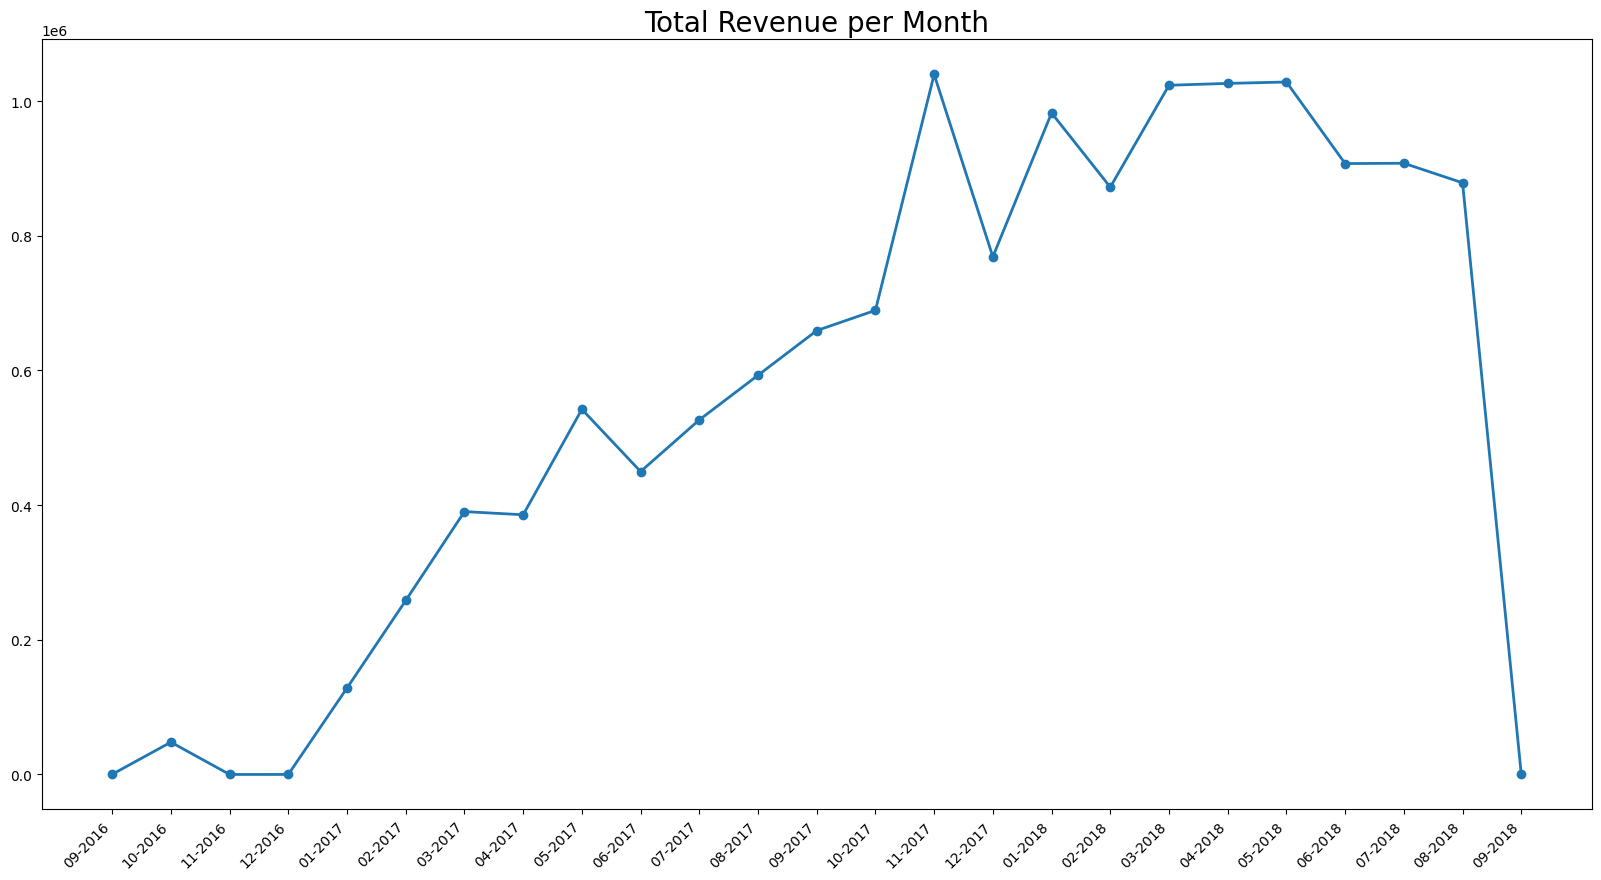

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["total_revenue"],
    marker='o', 
    linewidth=2,
    #color="#72BCD4"
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Revenue per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Apa saja 5 produk yang paling banyak dijual dan paling kurang diminati?

In [81]:
sum_order_items_df = order_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,order_item_id
0,cama_mesa_banho,14521.0
1,moveis_decoracao,11985.0
2,beleza_saude,11391.0
3,esporte_lazer,10223.0
4,informatica_acessorios,10117.0
5,utilidades_domesticas,9446.0
6,relogios_presentes,6789.0
7,ferramentas_jardim,6093.0
8,telefonia,5328.0
9,automotivo,5000.0


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\628792083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\628792083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


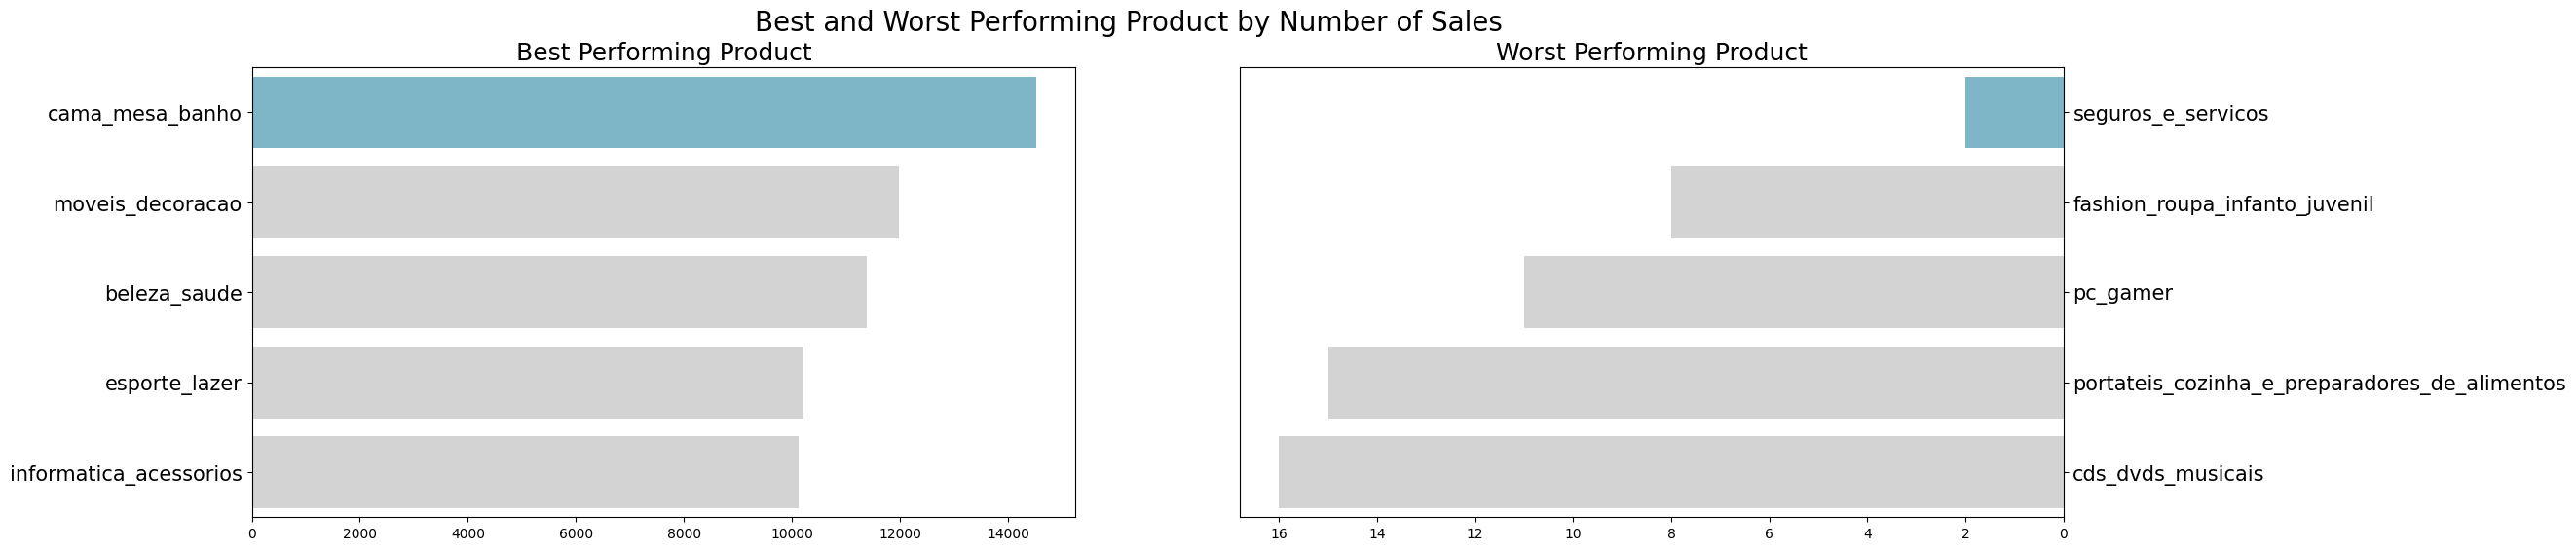

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Daerah mana dengan pembeli paling banyak berdasarkan kota dan state?

In [83]:
bycity_df = order_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4112,xinguara,9
4113,xique-xique,3
4114,zacarias,2
4115,ze doca,5


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\1399053802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\1399053802.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


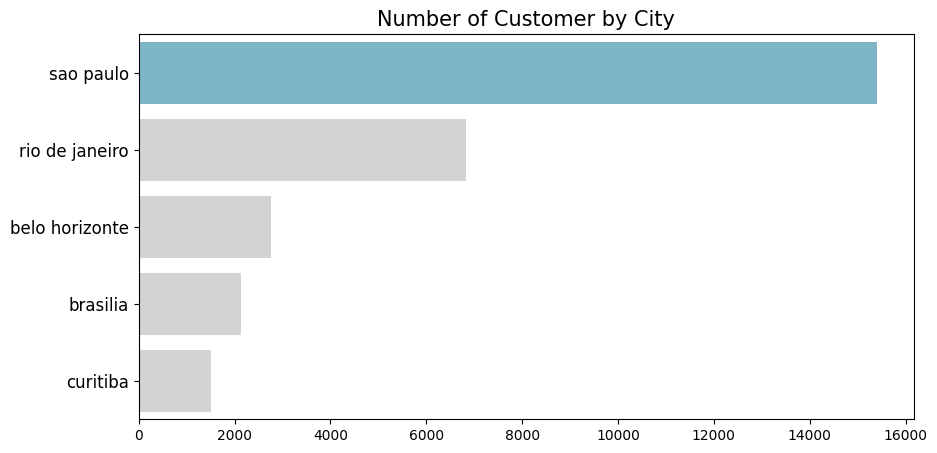

In [84]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [85]:
bystate_df = order_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,customer_state,customer_count
0,AC,81
1,AL,412
2,AM,148
3,AP,68
4,BA,3364
5,CE,1329
6,DF,2133
7,ES,2024
8,GO,2007
9,MA,743


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\590041443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\590041443.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


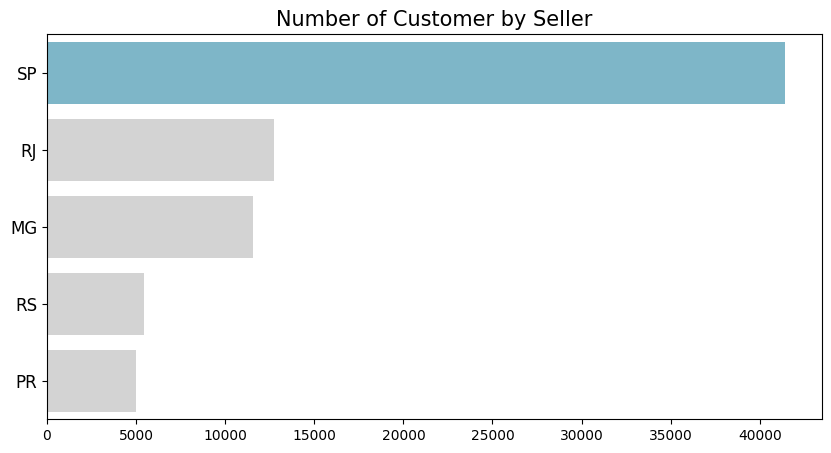

In [86]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Customer by Seller", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: Daerah mana dengan penjual paling banyak berdasarkan kota dan state?

In [87]:
bycity2_df = order_df.groupby(by="seller_city").seller_id.nunique().reset_index()
bycity2_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bycity2_df

,seller_city,seller_count
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
601,volta redonda,2
602,votorantim,4
603,votuporanga,4
604,xanxere,2


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\262548563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\262548563.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


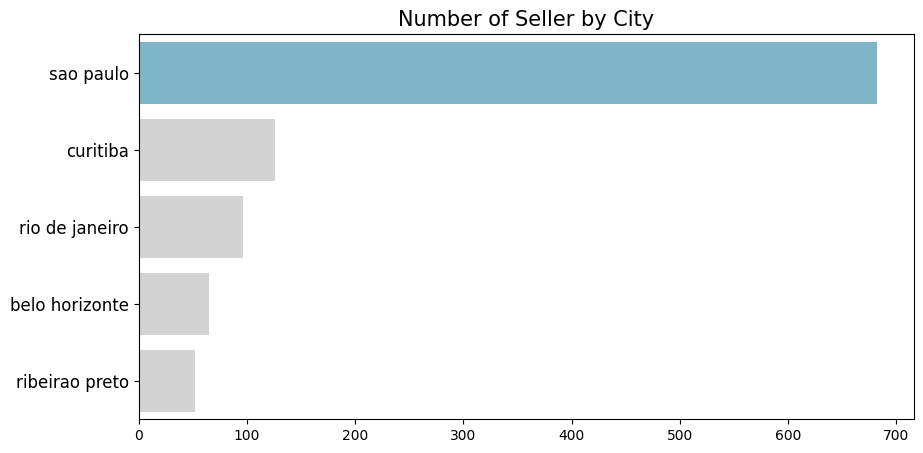

In [88]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count", 
    y="seller_city",
    data=bycity2_df.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Seller by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [89]:
bystate2_df = order_df.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate2_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
bystate2_df

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,240
9,MS,5


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\2216915577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\2216915577.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


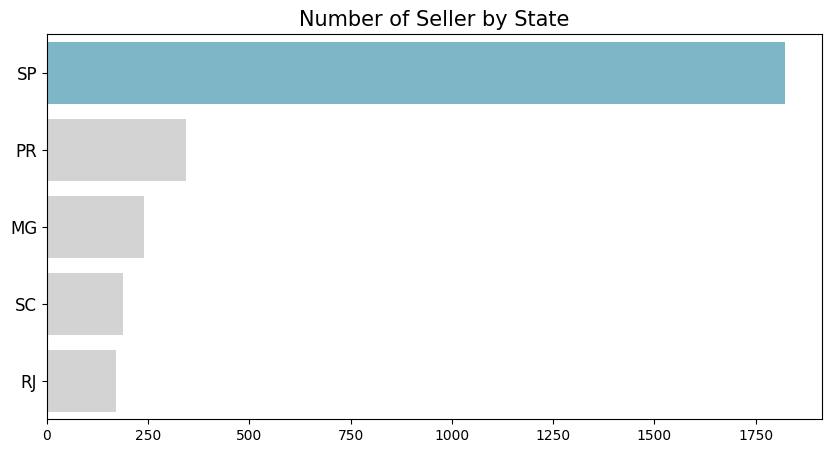

In [90]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count", 
    y="seller_state",
    data=bystate2_df.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors_
)
plt.title("Number of Seller by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### RFM Analysis

In [91]:
rfm_df = order_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [92]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,154


In [93]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


In [94]:
rfm_df.describe()

,frequency,monetary,recency
count,98816.0,98816.000000,98816.000000
mean,1.0,142.769487,246.167523
std,0.0,239.106911,153.367007
min,1.0,0.000000,0.000000
25%,1.0,45.950000,122.000000
50%,1.0,89.000000,228.000000
75%,1.0,152.000000,356.000000
max,1.0,13440.000000,729.000000


In [95]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
29100,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0
32423,54365416b7ef5599f54a6c7821d5d290,1,99.00,5
52994,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5
76247,c4c66f47534e09a03fc7a878a9eda5ea,1,65.00,5
71555,b8c19e70d00f6927388e4f31c923d785,1,169.80,5


In [96]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
65909,aa820cfb98796d553c3c534ec47b5408,1,59.00,279
65883,aa6edca5d83d4c8e9a2262b9847febd6,1,54.90,33
65882,aa6ea53126c88a731fd84dec4d4f3500,1,122.99,188
65881,aa6d96d0e25354fab970635297f96f7c,1,629.00,388


C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\2039715116.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\2039715116.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\2039715116.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

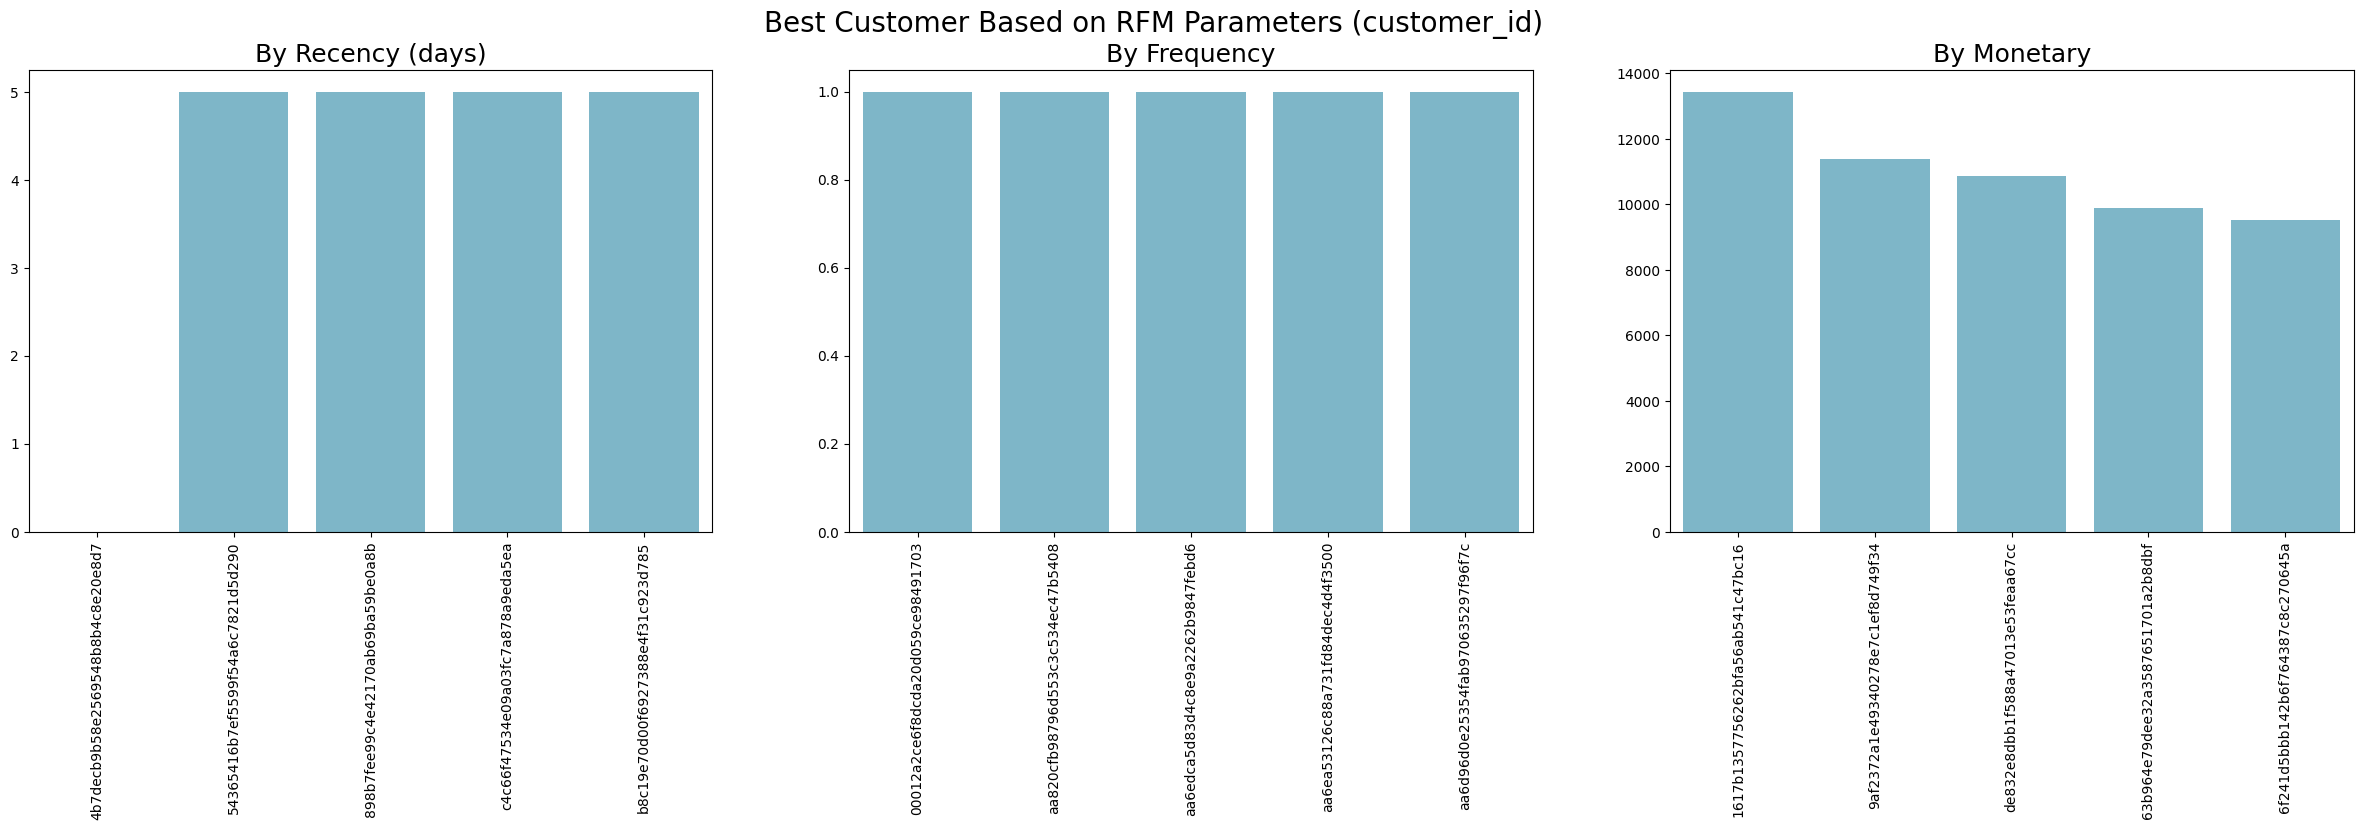

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=90, labelsize=10)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=90, labelsize=10)


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [98]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,34101.5,49408.5,49963.0
1,000161a058600d5901f007fab4c27140,1,54.90,414,16715.5,49408.5,31089.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2836.5,49408.5,79543.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383,20996.0,49408.5,73015.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,154,66562.0,49408.5,52363.5


In [99]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,34.510100,100.0,50.561650
1,000161a058600d5901f007fab4c27140,1,54.90,414,16.915783,100.0,31.461504
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,2.870487,100.0,80.496580
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383,21.247571,100.0,73.890362
4,000379cdec625522490c315e70c7a9fb,1,93.00,154,67.359537,100.0,52.990912


In [100]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.72
3,0002414f95344307404f0ace7a26f1d5,3.67
4,000379cdec625522490c315e70c7a9fb,3.42
5,0004164d20a9e969af783496f3408652,2.50
6,000419c5494106c306a97b5635748086,2.33


#### Segmentasi customer berdasarkan RFM_score

In [101]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.72,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.67,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.42,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [102]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16082
1,Low value customers,41385
2,Medium value customer,34646
3,Top customers,5502
4,lost customers,1201


In [103]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\ANNISA MUFIDATUN S\AppData\Local\Temp\ipykernel_28760\1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


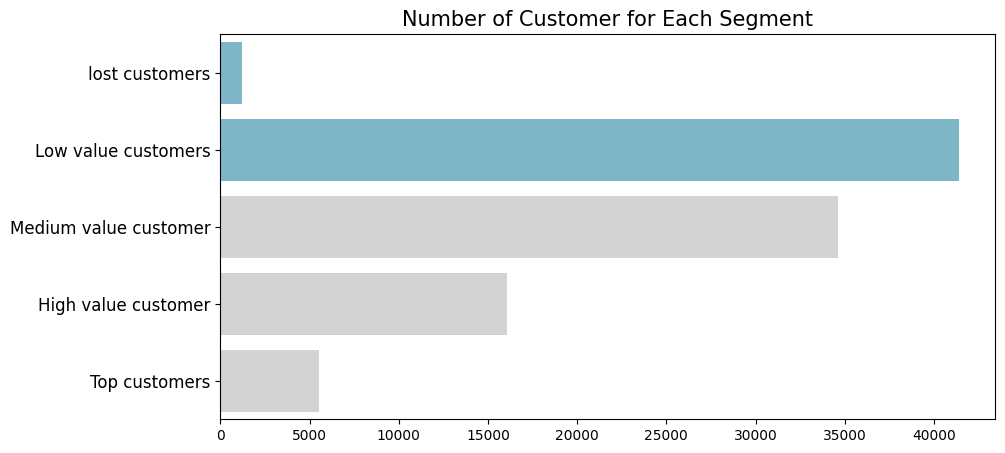

In [104]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

**1. Berapa jumlah revenue tiap bulan dari E-Commerce?**
Berdasarkan hasil plot, tiap bulan revenue dari E-Commerce cenderung fluktuatif namun menunjukkan tren naik. Penjualan tertinggi tercatat pada bulan November 2017 dan penjualan produk terendah ada di bulan September 2016, November 2016, Desember 2016, dan September 2018.

**2. Apa saja 5 produk yang paling banyak dijual dan paling kurang diminati?**
Berdasarkan barchart, lima produk yang paling diminati adalah
    - cama_mesa_banho
    - moveis_decoracao
    - beleza_saude
    - esporte_lazer
    - informatica_accessorios
Sedangkan untuk lima produk paling kurang diminati adalah
    - seguros_e_servicos
    - fashion_roupa_infanto_juvenil
    - pc_gamer
    - portateis_conzinha_e_preparadores_de_alimentos
    - cds_dvds_musicais

**3.Daerah mana dengan pembeli paling banyak berdasarkan kota dan state?**
Berdasarkan data pelanggan, pelanggan paling banyak berasal dari kota sao paulo, rio de janeiro, belo horizonte, brasilia, curitiba. Untuk state paling banyak berasal dari SP, RJ, MG, RS, PR.

**4. Daerah mana dengan penjual paling banyak berdasarkan kota dan state?**
Berdasarkan data penjual, penjual paling banyak berasal dari kota sao paulo. curitiba, rio de janeiro, belo horizonte, ribeirao preto. Untuk state paling banyak berasal dari SP, PR, MG, SC, RJ.

**5. RFM Analysis**
Berdasarkan grafik Best Customer Based on RFM Parameters kita dapat melihat 5 customer dengan terbaik di index recency (Kapan terakhir pelanggan melakukan transaksi?), frequency(Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?), dan monetary (Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?).


In [105]:
order_df.to_csv("order_data.csv", index=False)